<table align="center" width=100%>
    <tr>
       <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> MINI PROJECT 1 Inferential Statistics<br>
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="Great_Learning_Logo.jpg">
        </td>
    </tr>
</table>

## Group Members Name

### 1. Dinesh Subramanian

### 2. S.Aishwarya

### 3. Vinod A

### Question -1(20 Marks)

a.Read the Dataset "turnout.csv" (1 mark)

b.Identify non-numerical inputs and convert into numerical wherever needed (3 marks) (*Hint: Use replace function if needed)

c. Check whether the dataset having null values or not. If yes, do replace them with suitable average value (2 marks) (*Think out of box)

d.Find mean, median and mode for atleast one possible column for each (3 marks)

e.Check the outliers and remove it from the dataset. (3 marks)

f.A city affected by 3 cyclones in a year on an average. Find the probability if the same city will getting affected by exactly 2 cyclones in the upcoming year (4 marks)

g.If an athlete attended  6 olympics in his lifetime. Find the probability if he exactly have 2 wins (4 marks)



In [2]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

### A. Read the Dataset "turnout.csv" (1 mark)

In [3]:
df = pd.read_csv("turnout.csv",encoding = "ANSI")
df

,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,1011,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,1012,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,1013,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,1014,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,1015,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2135,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,2136,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,2137,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,2138,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


### B.Identify non-numerical inputs and convert into numerical whatever needed (3 marks) 
(*Hint: Use replace function if needed)

In [4]:
# planned to convert m/f to 0/1 in gender and head_gender columns

df['gender'].replace(to_replace=['m','f'], value= [0 , 1],inplace=True)
df['head_gender'].replace(to_replace=['m','f'], value= [0 , 1],inplace=True)
df.head()

,Employee ID,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,1011,1,0,35.0,Banks,HR,rabrecNErab,no,1,white,bus,6.2,4.1,5.7,7.1,8.3
1,1012,1,0,33.0,Banks,HR,empjs,no,0,white,bus,6.2,4.1,5.7,7.1,8.3
2,1013,1,1,35.0,PowerGeneration,HR,rabrecNErab,no,0,white,bus,6.2,6.2,2.6,4.8,8.3
3,1014,1,1,35.0,PowerGeneration,HR,rabrecNErab,no,0,white,bus,5.4,7.6,4.9,2.5,6.7
4,1015,1,0,32.0,Retail,Commercial,youjs,yes,1,white,bus,3.0,4.1,8.0,7.1,3.7


### C. Describe the statistical measures using single function (2 marks)

In [5]:
df.describe()

,Employee ID,event,gender,age,head_gender,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1128.000000,1127.000000,1128.000000,1128.000000,1128.000000
mean,1575.000000,0.505757,0.755536,31.050136,0.482728,5.593262,5.480479,5.593794,5.667110,5.881560
std,326.058533,0.500188,0.429959,7.419808,0.499923,1.852222,1.703578,1.977562,1.709213,1.903753
min,1011.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,1293.000000,0.000000,1.000000,25.000000,0.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,1575.000000,1.000000,1.000000,30.000000,0.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,1857.000000,1.000000,1.000000,36.000000,1.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,2139.000000,1.000000,1.000000,98.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### D.Find mean, median and mode for atleast one possible column for each (3 marks)

In [6]:
import statistics as stat

# mean of age
print("Mean of column age :",stat.mean(df["age"]))

# median of age
print("Median of column age :",stat.median(df["age"]))

# mode of age
print("Mode of column age :",stat.mode(df["age"]))

Mean of column age : 31.050135512072632
Median of column age : 30.0
Mode of column age : 26.0


### E.Check the outliers and remove it from the dataset. (3 marks)

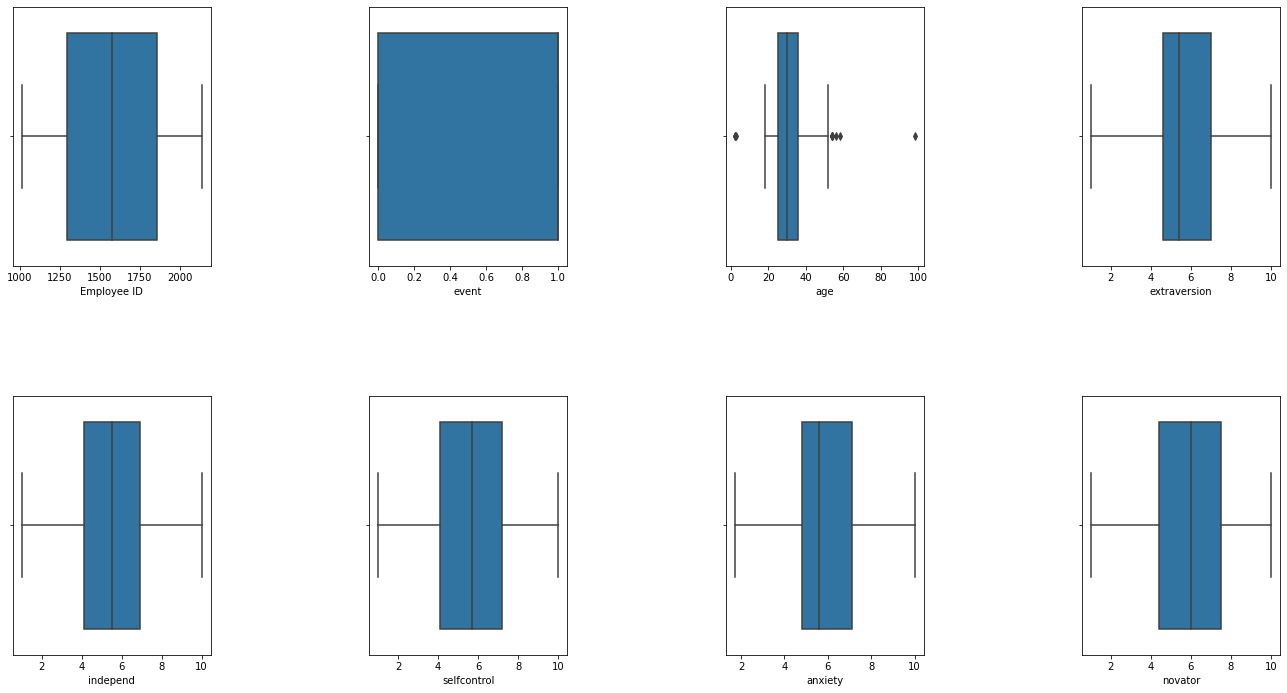

In [7]:
#dimensions of subplots (rows, columns, figsize=(width,height))
import warnings
fig, axes = plt.subplots(2, 4, figsize=(20,10))
warnings.filterwarnings("ignore")

#create chart in each subplot
sns.boxplot(df['Employee ID'],ax=axes[0,0])
sns.boxplot(df['event'],ax=axes[0,1])
sns.boxplot(df['age'],ax=axes[0,2])
sns.boxplot(df['extraversion'],ax=axes[0,3])
sns.boxplot(df['independ'],ax=axes[1,0])
sns.boxplot(df['selfcontrol'],ax=axes[1,1])
sns.boxplot(df['anxiety'],ax=axes[1,2])
sns.boxplot(df['novator'],ax=axes[1,3])

fig.subplots_adjust(left=0.10, right=0.98, bottom=0, top=0.9,
                    hspace=0.5, wspace=0.8)


In [8]:
# outlier verification for some columns depends on  normal distribution
columnsNeeded = ['Employee ID','age','independ','selfcontrol','anxiety','novator','extraversion','event']
for i in columnsNeeded:
    outliersList = []
    [ outliersList.append(j) for j in df[i] if (j>=((df[i].mean())+ 3*(df[i].std())) or j<=((df[i].mean())- 3*(df[i].std())))]
    print(i,len(outliersList) , " list : ", outliersList)

Employee ID 0  list :  []
age 10  list :  [2.0, 98.0, 2.0, 3.0, 54.0, 54.0, 56.0, 58.0, 54.0, 54.0]
independ 0  list :  []
selfcontrol 0  list :  []
anxiety 0  list :  []
novator 0  list :  []
extraversion 0  list :  []
event 0  list :  []


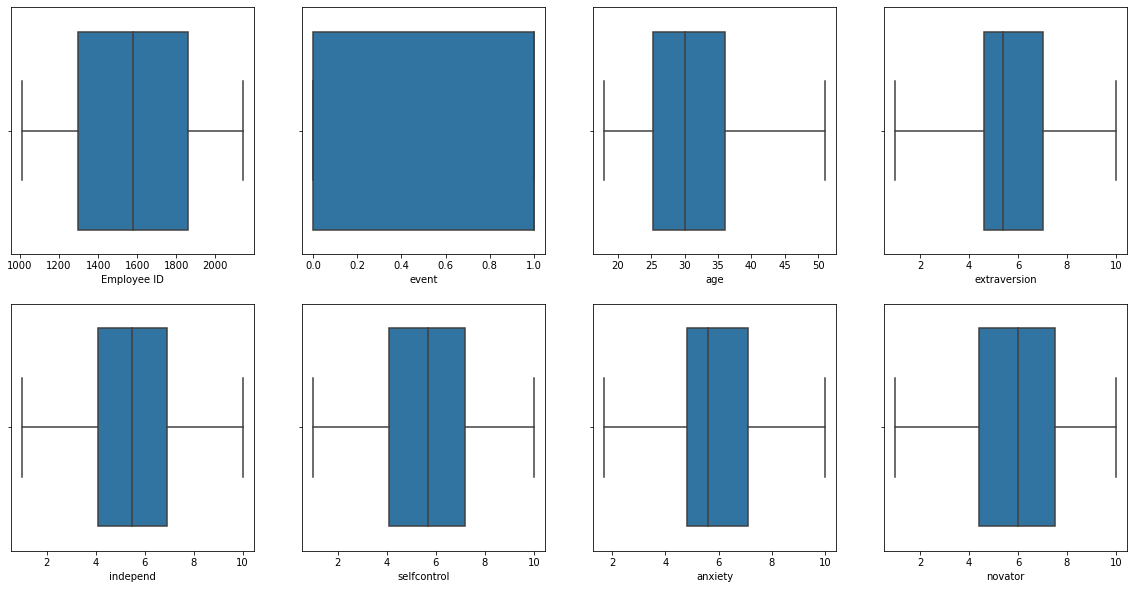

In [10]:
# as age columns have 10 outlier values as per normalization, we are removing it
outliersList =[]
[ outliersList.append(j) for j in df['age'] if (j>=((df['age'].mean())+ 3*(df['age'].std())) or j<=((df['age'].mean())- 3*(df['age'].std())))]
[df.drop(df[df['age'] == i].index, inplace = True) for i in outliersList]

fig, axes = plt.subplots(2, 4, figsize=(20,10))
# plots after removing the outliers

#create chart in each subplot
sns.boxplot(df['Employee ID'],ax=axes[0,0])
sns.boxplot(df['event'],ax=axes[0,1])
sns.boxplot(df['age'],ax=axes[0,2])
sns.boxplot(df['extraversion'],ax=axes[0,3])
sns.boxplot(df['independ'],ax=axes[1,0])
sns.boxplot(df['selfcontrol'],ax=axes[1,1])
sns.boxplot(df['anxiety'],ax=axes[1,2])
sns.boxplot(df['novator'],ax=axes[1,3])
plt.show()

### F. A city affected by 3 cyclones in a year on an average. Find the probability if the same city will getting affected by exactly 2 cyclones in the upcoming year (4 marks)

In [9]:
print("The Probablity of exactly getting 2 cyclones in upcoming year",stats.poisson.pmf(2,3))

The Probablity of exactly getting 2 cyclones in upcoming year 0.22404180765538775


### G.If an athlete attended 6 olympics in his lifetime. Find the probability if he exactly have 2 wins (4 marks)

In [11]:
# lifetime be any and comes under time range
# attended olympics be 6
a = 6
# wins be 2
x = 2
# lets calculate probablity based on poisson

print("The Probablity of exactly getting 2 wins out of 6 olymics was",stats.binom.pmf(x,a,0.5))

The Probablity of exactly getting 2 wins out of 6 olymics was 0.23437500000000003
